In [12]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

In [2]:
# 시작전 설정
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
#한글설정
plt.rc('font', family='Malgun Gothic')
#plt.rc('font', family='AppleGothic') #mac
plt.rc('axes', unicode_minus=False)
# 경고 메세지 안보이게
importwarnings
warnings.filterwarnings(action='ignore')

NameError: name 'importwarnings' is not defined

<b><font color="red" size="6"> 12장. 데이터 시각화 </font></b>
- 시각화 라이브러리 : matplotlib, seaborn(데이터시각화), folium(지도시각화)
 * matplotlib : 파이썬에서 가장 쉽게 많이 사용하는 시각화 라이브러리. 판다스 내부에 포함
 * seaborn : matplotlib기반으로 다양한 색, 테마, 차트 기능과 groupby 기능 포함된 라이브러리
 ## 1절. matplotlib
 - https://pypi.org/project/matplotlib/
 - https://matplotlib.org/stable/api/index

In [3]:
import matplotlib
matplotlib.__version__

'3.7.0'

## 1.1 패키지 import 및 기본 설정

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
# 화면을 선명하게 설정
%config InlineBackend.figure_format = 'retina'

# 한글 설정
plt.rc('font', family='Malgun Gothic')  # 윈도우즈
# plt.rc('font', family='AppleGothic')  # mac
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('axes', unicode_minus=False)    # 축의 - 깨짐 방지

# warning(경고) 안보이게 설정


## 1.2 그래프 그리기
- matplotlib으로 그래프 그리기 위한 단계
    1. 데이터 준비
    2. 그래프 생성
    3. 그래프 함수로 그리기
    4. 그래프 커스터마이징
    5. 그래프 출력 및 저장

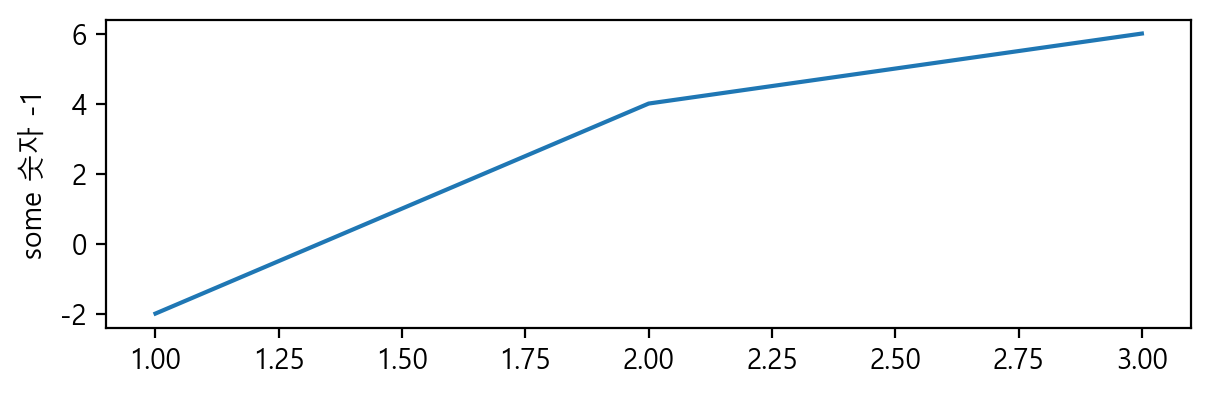

In [9]:
x = [1, 2, 3] # 1) 데이터 준비
y = [-2, 4, 6]

plt.figure(figsize=(7, 2)) # 2) 그래프 객체 생성

plt.plot(x, y) # 3) 그래프 함수 .plot(x,y,color='r') 선그래프
plt.ylabel('some 숫자 -1') # 4) 커스터마이징
plt.show() # 5) 그래프 화면 출력 cf)plt.savefig('파일명.jpg,png')

## 1.3 그래프 영역 나누기
### 1) subplot()함수로 서브플롯(그래프) 추가하기

In [9]:
import numpy as np
x = np.arange(0, 10, 0.01)
len(x)

1000

<function matplotlib.pyplot.show(close=None, block=None)>

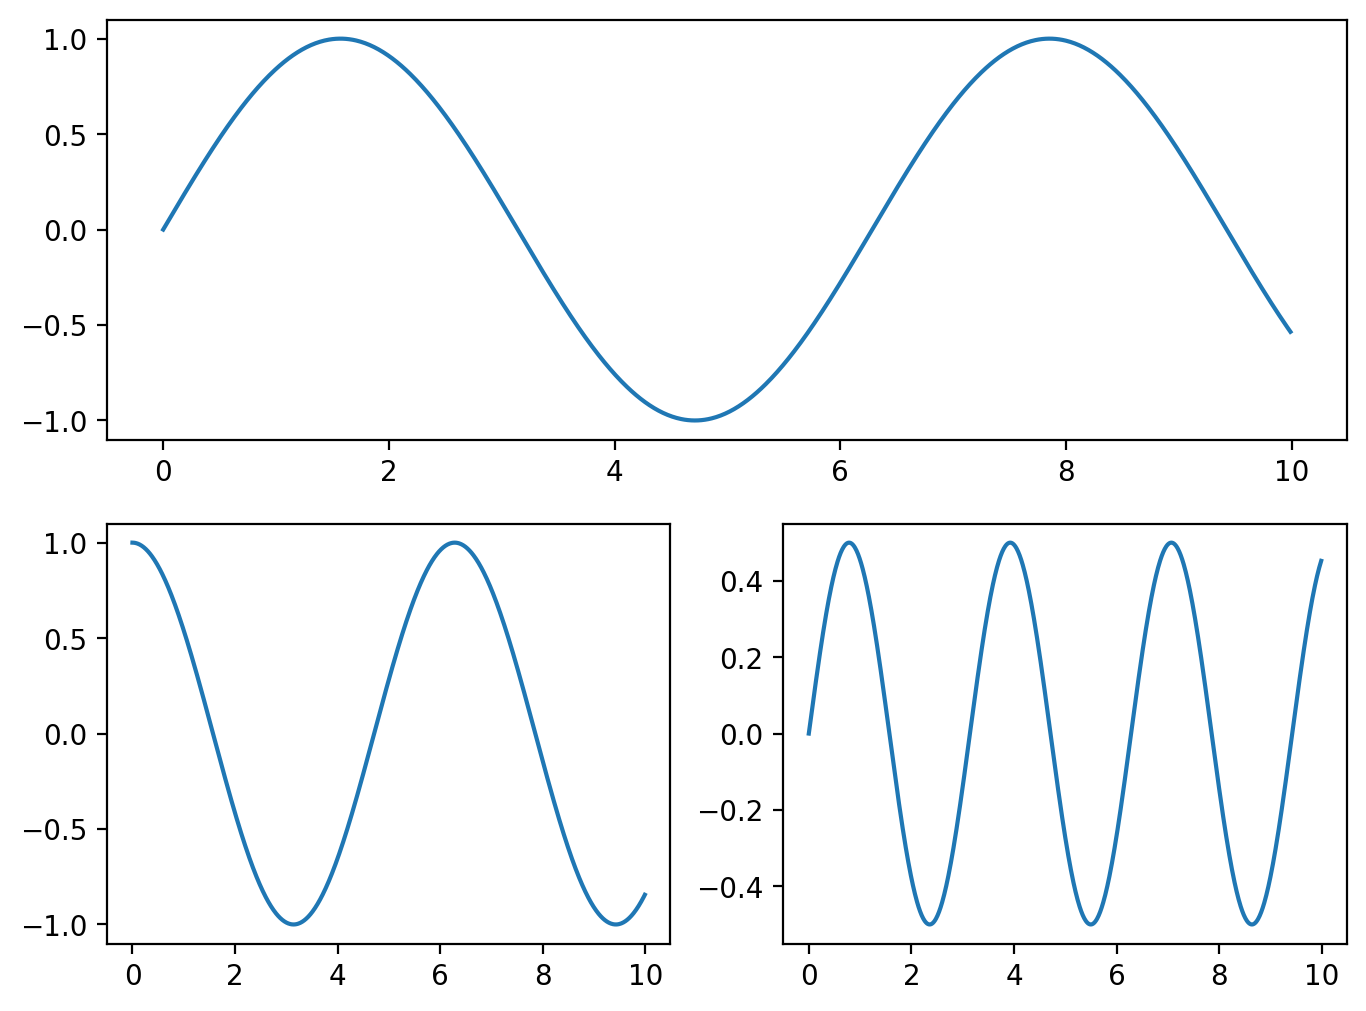

In [10]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)

plt.plot(x, np.sin(x)); plt.subplot(2, 2, 3)

plt.plot(x, np.cos(x))
plt.subplot(224) # 콤마를 하나 안하나 똑같음

plt.plot(x, np.sin(x)*np.cos(x))

#plt.show

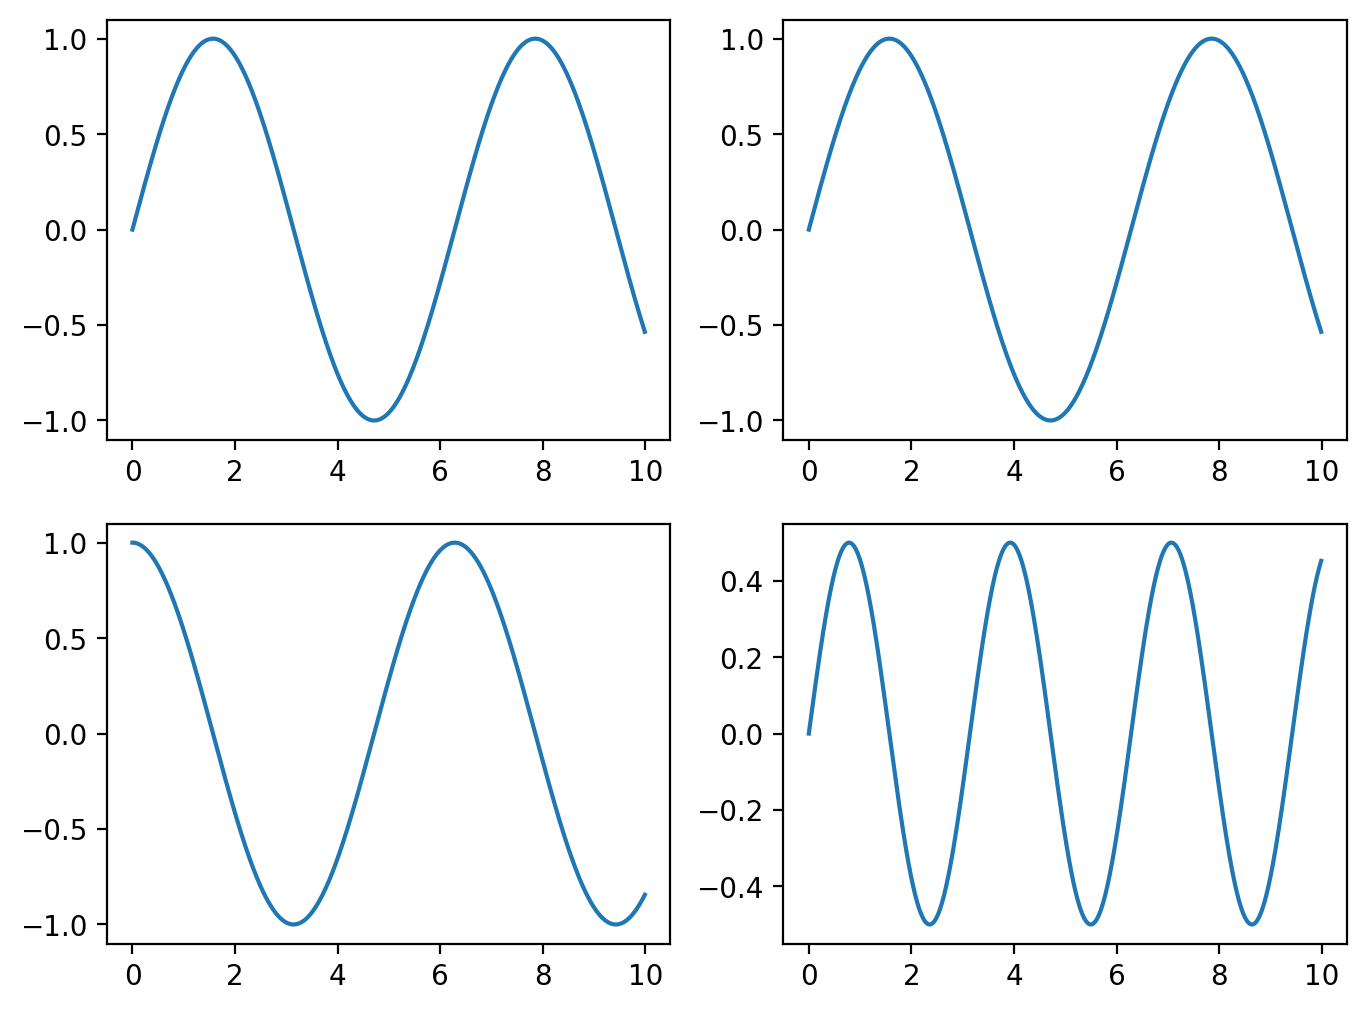

In [12]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 2); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 3); plt.plot(x, np.cos(x))
plt.subplot(2, 2, 4); plt.plot(x, np.sin(x)*np.cos(x))

### 2) subplots()함수로 스브플롯 추가하기
- 교안(14page) : https://wikidocs.net/92085

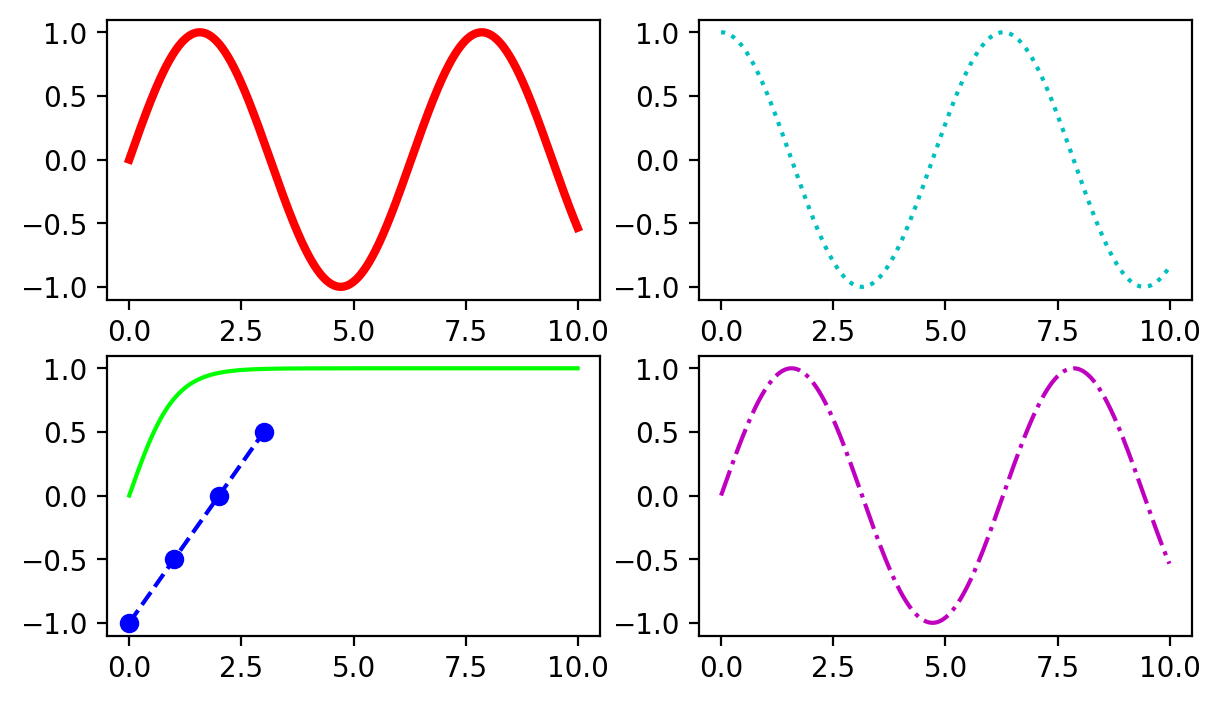

In [23]:
# 2행 2열 서브 플롯(그래프)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 4)) # nrow=2행 ncol=2열
axes[0, 0].plot(x, np.sin(x), 'r', linewidth=3)
axes[0, 1].plot(x, np.cos(x), 'c:') # linestyle=':', '--', '-', 기본값=실선
axes[1, 0].plot([0,1,2,3],[-1,-0.5,0,0.5], 'bo--') # marker='o','^','s'  linestyle='--'
axes[1, 0].plot(x, np.tanh(x), '#00FF00')
axes[1, 1].plot(x, np.sin(x), 'm-.')
plt.show()

array([<Axes: >, <Axes: >], dtype=object)

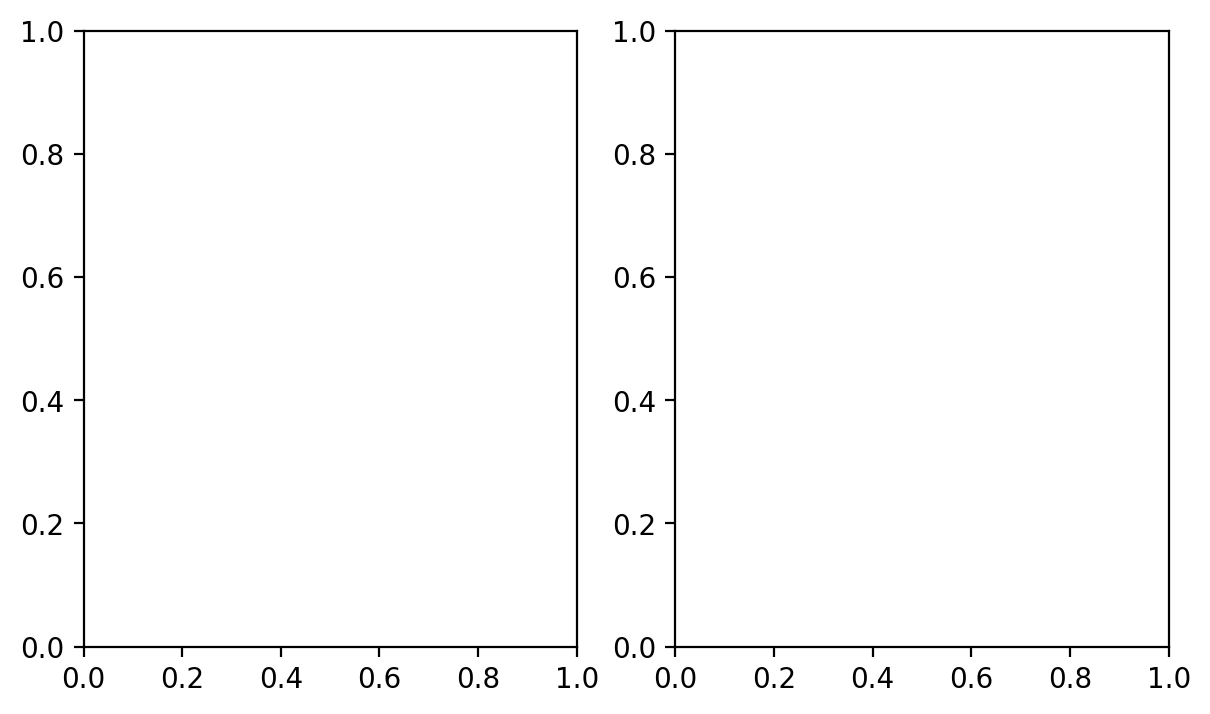

In [25]:
# 1차원 2열 서브 플롯(그래프)
fig, axes = plt.subplots(ncols=2, figsize=(7, 4)) 
axes
# axes[0, 0].plot(x, np.sin(x), 'r', linewidth=3)
# axes[0, 1].plot(x, np.cos(x), 'c:') # linestyle=':', '--', '-', 기본값=실선

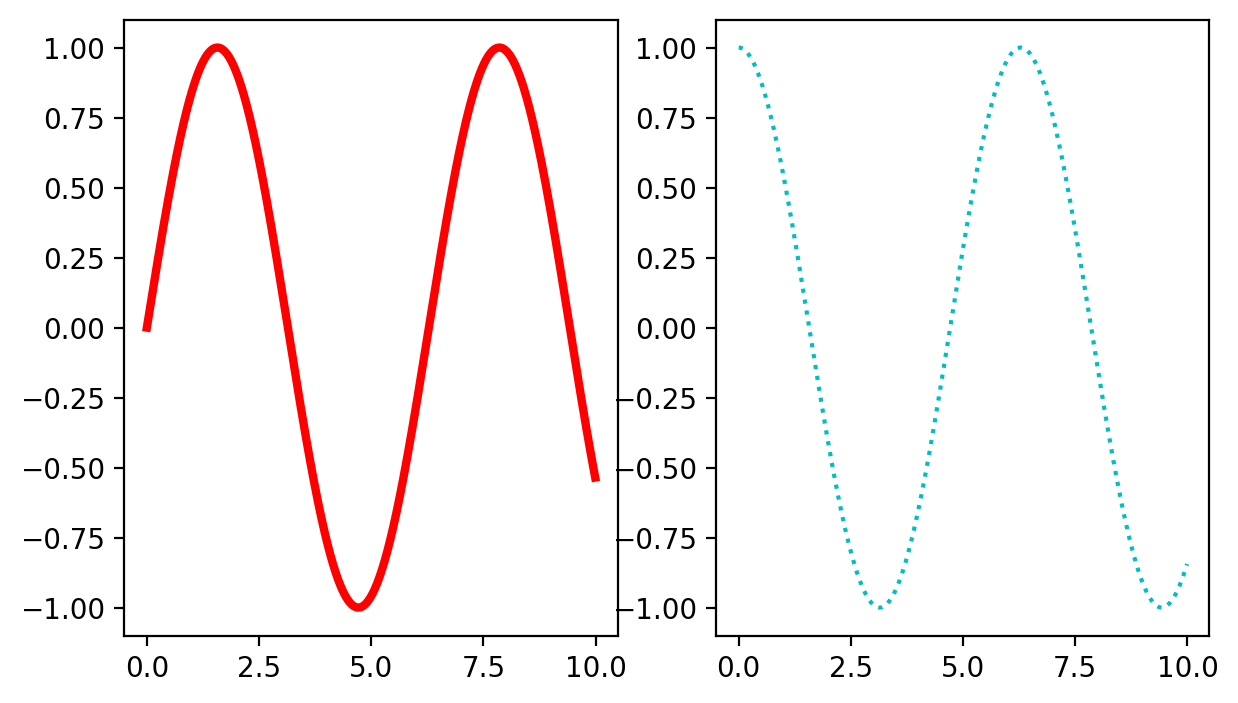

In [26]:
# 1차원 2열 서브 플롯(그래프)
fig, axes = plt.subplots(ncols=2, figsize=(7, 4)) # nrow=1행(기본값) ncol=2열
axes[0].plot(x, np.sin(x), 'r', linewidth=3)
axes[1].plot(x, np.cos(x), 'c:') # linestyle=':', '--', '-', 기본값=실선

## 3) pandas.DataFrame.plot()
- plt.plot or axes.plot(x, y, fmt)
- df.plot(X=열이름, y=열이름, kind='line', figsize=, title, xlim(x좌표), xlim(y좌표), ...)
    * kind : line(기본값,선그래프), scatter(점도표), bar, barh, box, pie, density, violin, axvline, axhline ...)
    * xlim, ylim : list/tuple

In [28]:
import matplotlib.pyplot as plt
from seaborn import load_dataset
iris = load_dataset('iris')
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
23,5.1,3.3,1.7,0.5,setosa


### 그래프를 저장 하는 방법 plt.savefig('저장할주소')
#### 범례사용 https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

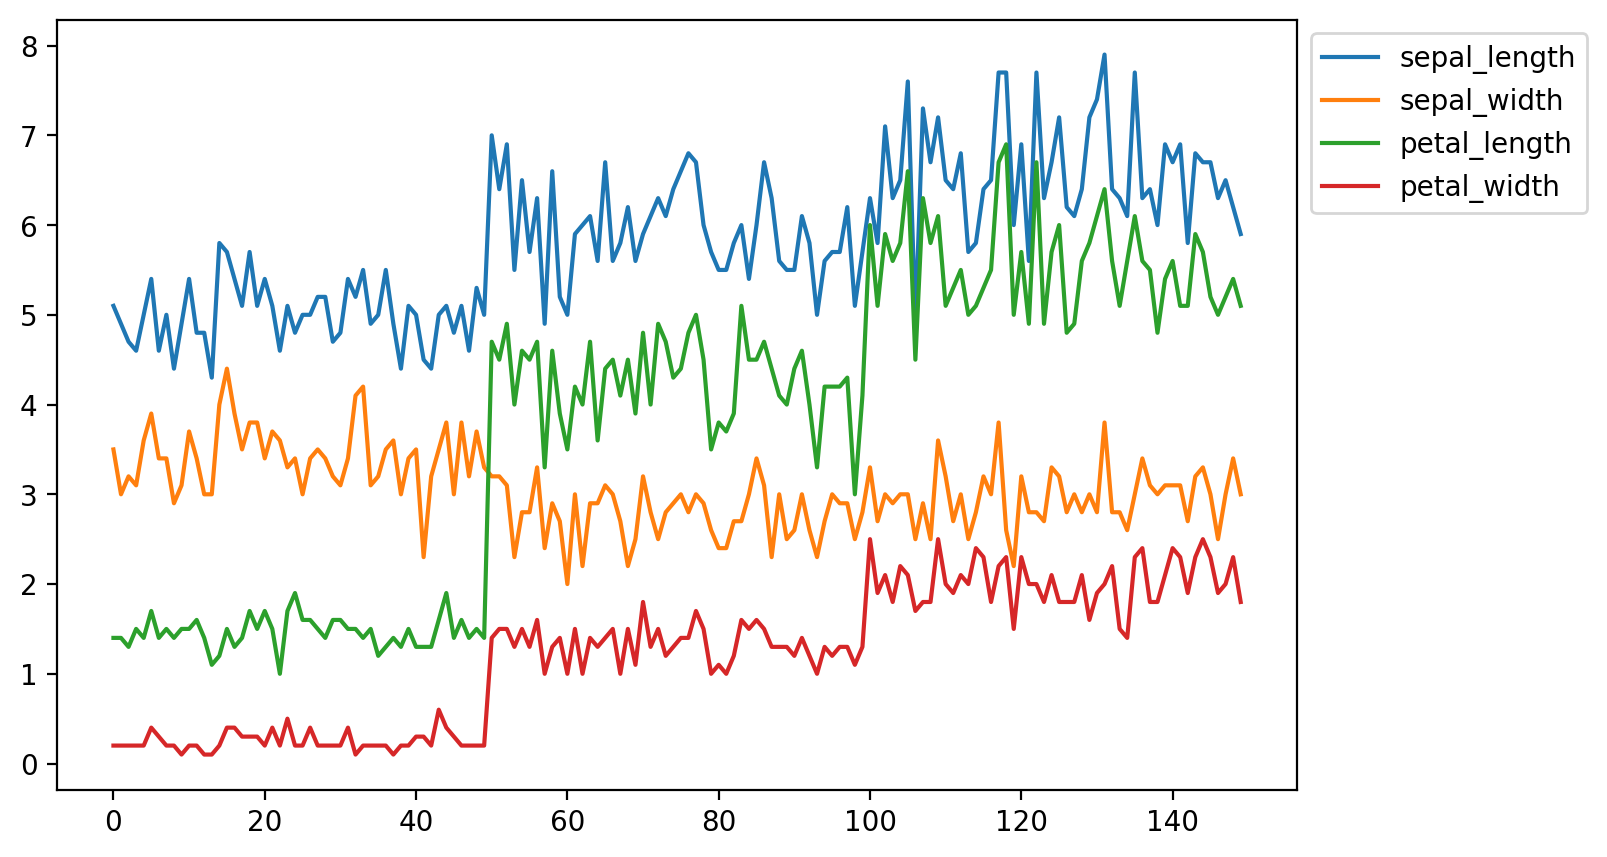

In [38]:
#iris.plot(x='petal_length', y='petal_width')
g = iris.plot(kind='line', figsize=(8,5))

#범례
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.savefig('data/ch12_iris.jpg', bbox_inches='tight') # 그래프를 파일로 저장하는 방법

In [44]:
iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


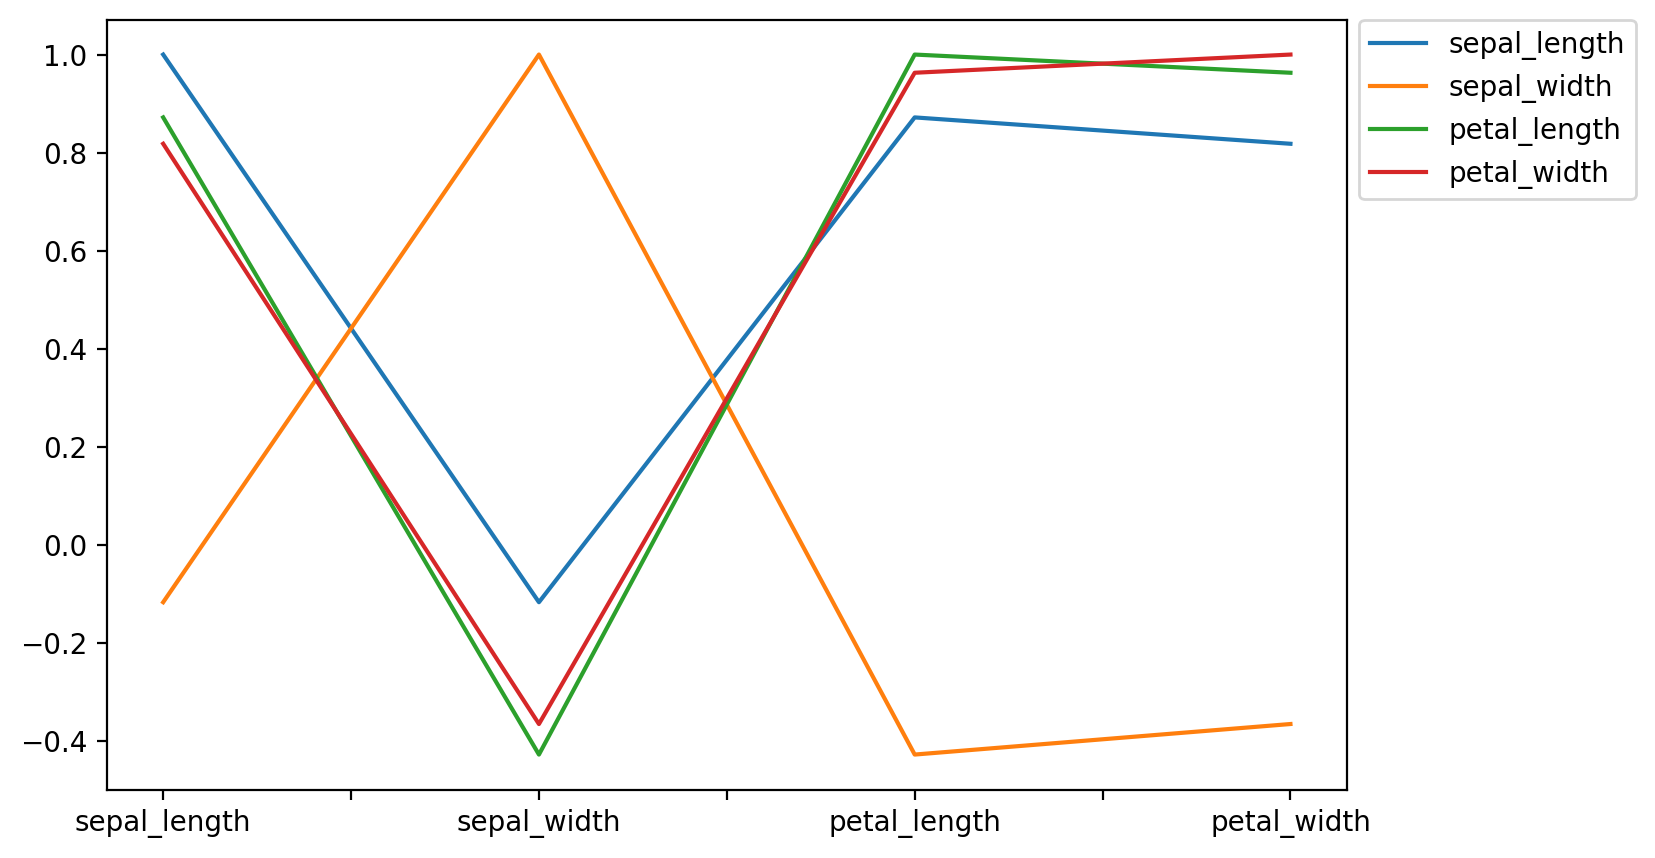

In [45]:
iris.corr(numeric_only=True).plot(kind='line', figsize=(8,5))
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

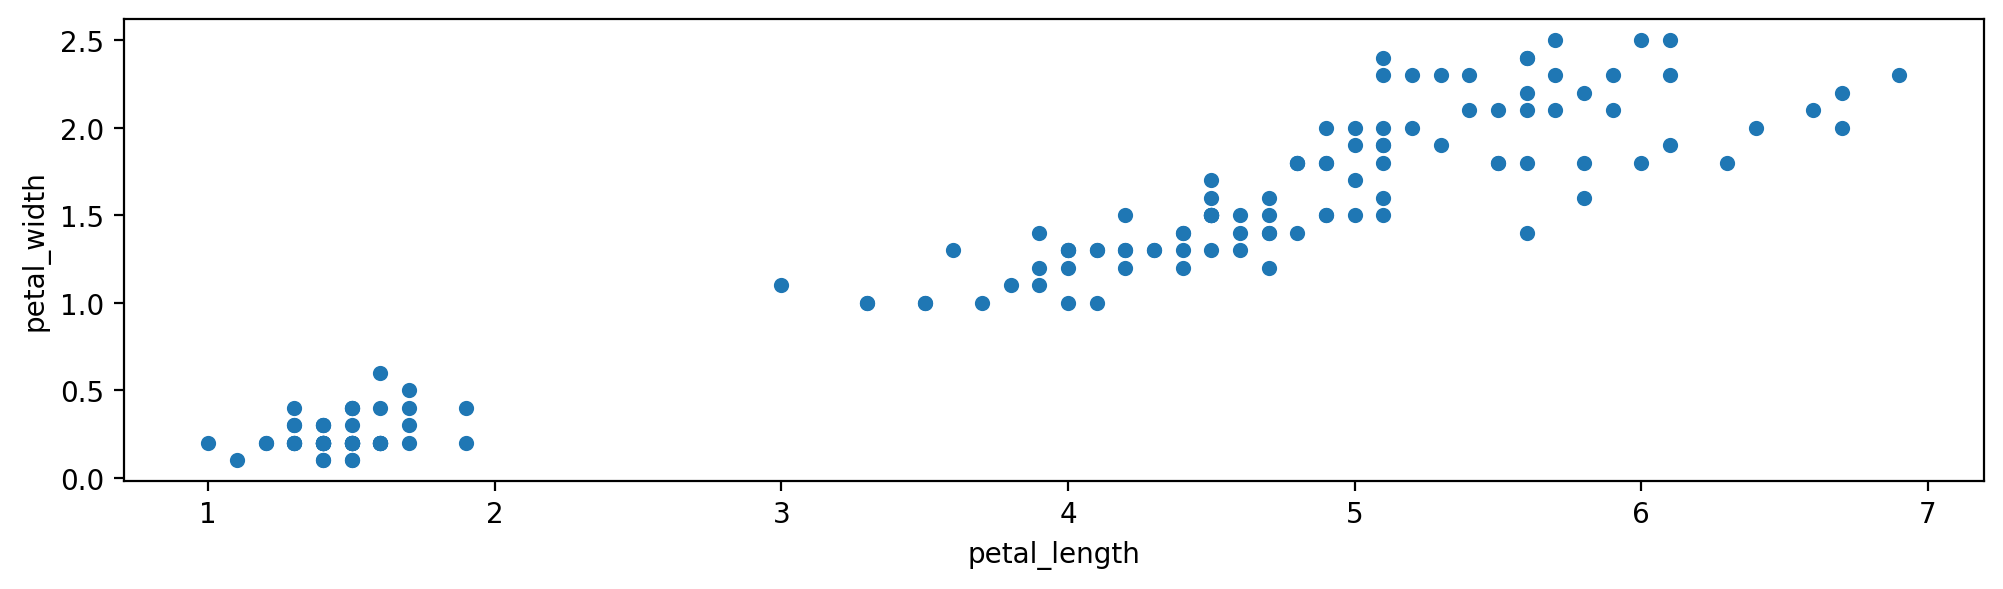

In [43]:
iris.plot(x='petal_length', y='petal_width', kind='scatter', figsize=(12,3))
plt.show()

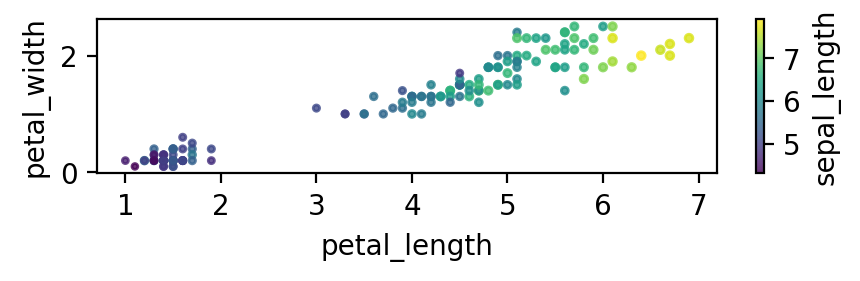

In [55]:
iris.plot(kind='scatter',
          x='petal_length',
          y='petal_width',
          figsize=(5,1),
          s='sepal_length', # s= 사이즈(size)
          c='sepal_length', # c= 칼라(color)
          alpha=.8)         # alpha= 0<=투명도<=1
plt.show()

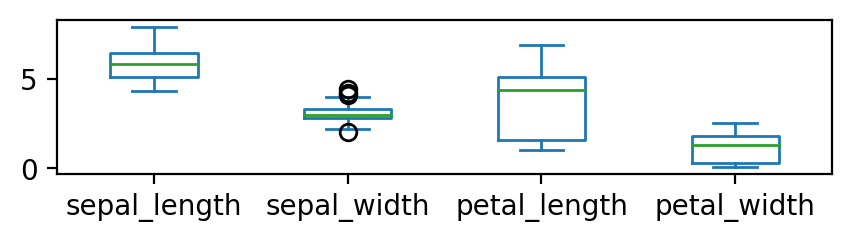

In [54]:
# 모든 열의 boxplot(이상치 여부, q1(1사분위수), q2, q3, min, max)
iris.plot(kind='box', figsize=(5,1))
plt.show()

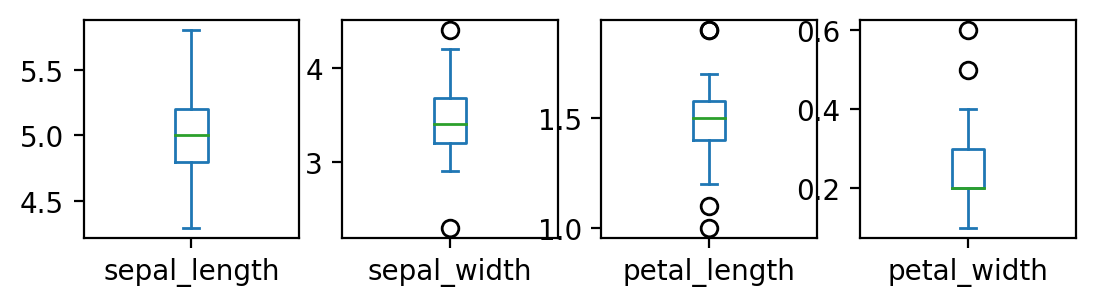

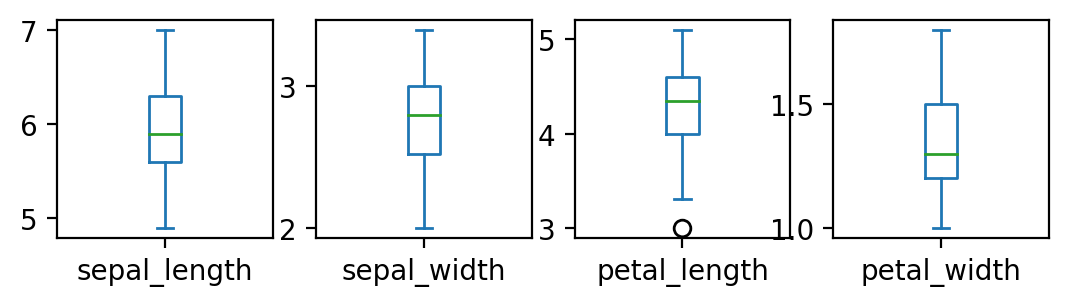

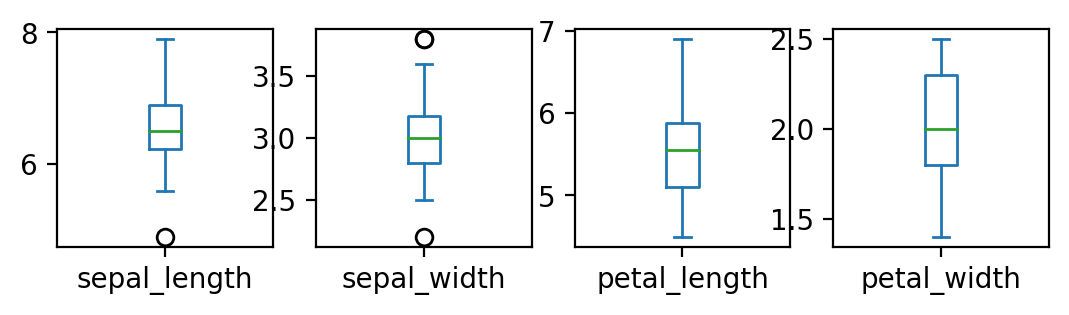

In [61]:
# 종별 boxplot
iris.groupby('species').plot(kind='box',
                             subplots=True,
                             layout=(3,4),
                             sharex=True) # sharex=True x축 공유
plt.show()

## 1.4 다양한 그래프 그리기
- pyplot함수들 : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html
### 1) plt.scatter() : 산점도 그래프

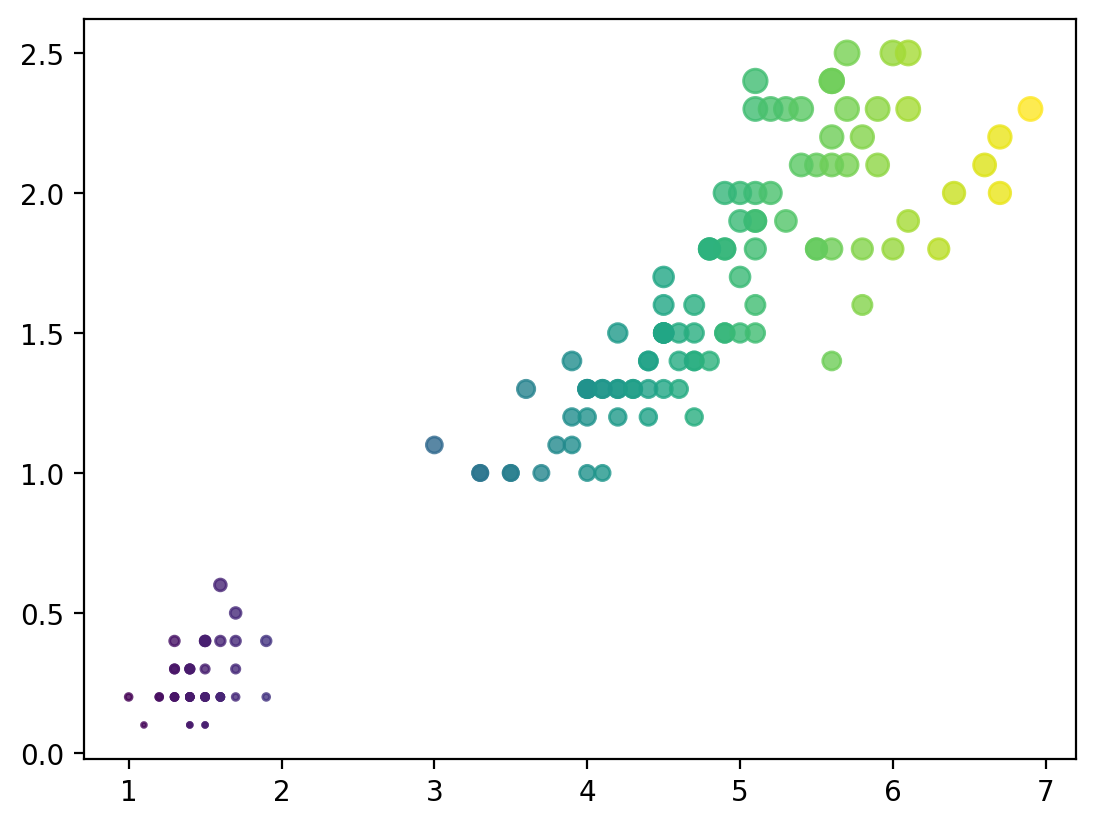

In [65]:
plt.scatter(iris.petal_length, iris.petal_width,
            s=iris.petal_width*30,  #size
            c=iris.petal_length*20, #color
            alpha=.8)               #투명도

### 2) boxplot(단점:분포를 몰라), violinplot(분포를볼때씀)

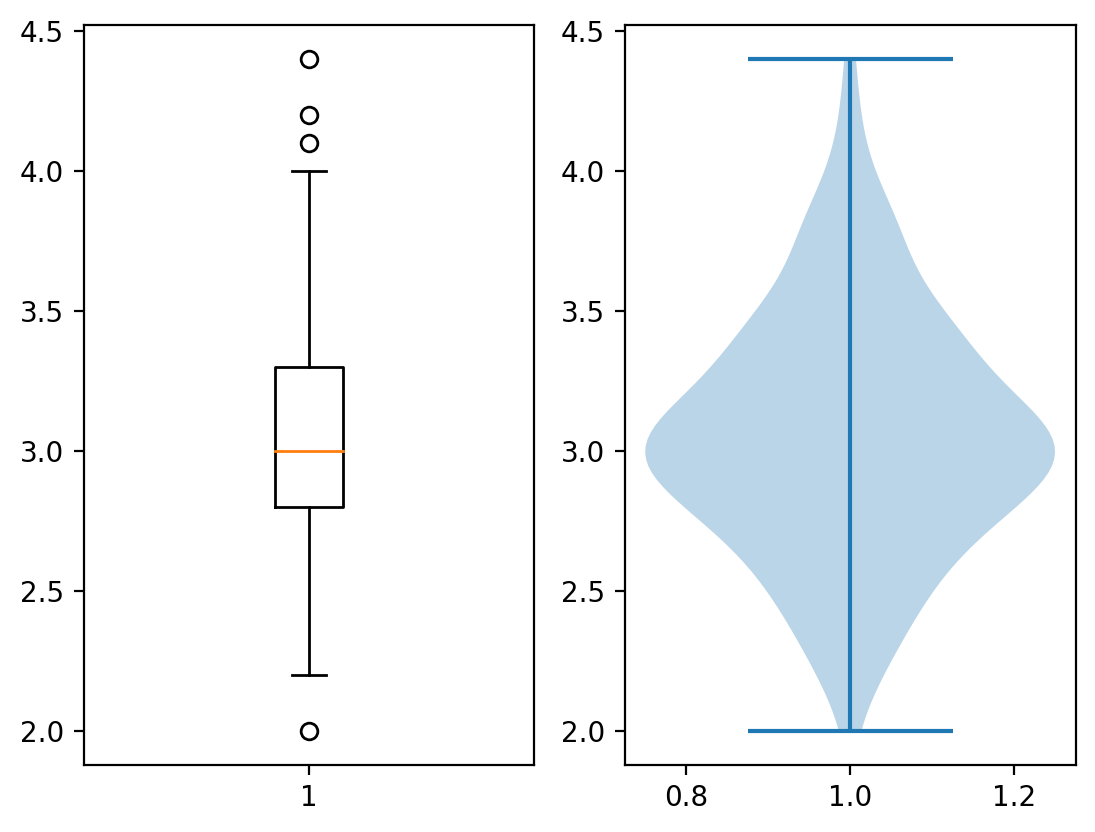

In [70]:
fig, axes = plt.subplots(ncols=2)
axes[0].boxplot(iris.sepal_width); axes[1].violinplot(iris.sepal_width)
plt.show()

### 3) bar(막대세로그래프), barh(막대가로그래프), axvline(수직선), axhline(수평선)

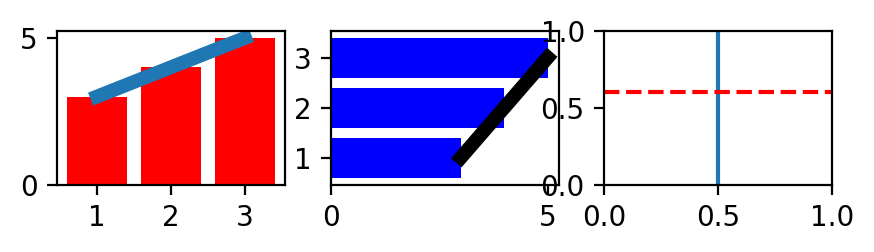

In [87]:
x=[1, 2, 3]
y=[3, 4, 5]
fig, axes = plt.subplots(ncols=3, figsize=(5,1))
axes[0].bar(x, y, color='r')
axes[0].plot(x, y, linewidth=5)
axes[1].barh(x, y, color='b')
axes[1].plot(y, x, 'k', linewidth=5)
axes[2].axvline(0.5)
axes[2].axhline(0.6, c='r', linestyle='--')
plt.show()

### 4) hist(도수분포표;히스토그램)

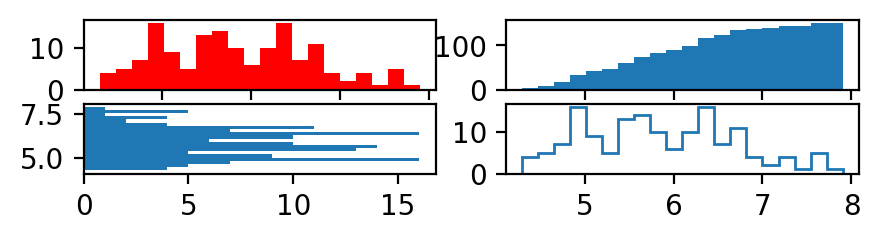

In [89]:
fig, axes = plt.subplots(2, 2, figsize=(5, 1))
axes[0,0].hist(iris['sepal_length'], bins=20, color='r') # 히스토그램(도수분포표) bins=10(기본값) :구간갯수
axes[0,1].hist(iris['sepal_length'], bins=20, cumulative=True) # 누적 히스토그램
axes[1,0].hist(iris['sepal_length'], bins=20, orientation='horizontal') # 수평 히스토그램
axes[1,1].hist(iris['sepal_length'], bins=20, histtype='step') # 
plt.show()

## 1.5 그래프 커스터마이징
### 1) linestyle, linewidth, color, marker, ... (plot의 매개변수 지정되는 것들)
### 2) text(), annotate()
- annotate(교안29page) : https://matplotlib.org/api/axes_api.html#text-and-annotations

In [13]:
# 개별 폰트 설정을 위한 방법
from matplotlib.font_manager import FontProperties
font_path = r'C:/Windows/Fonts/HMFMPYUN.TTF' # ttf폰트파일(네이버폰트, 구글폰트 등에서 다운로드하거나 pc의 폰트파일)
font_prop = FontProperties(fname=font_path, size=30)

<function matplotlib.pyplot.show(close=None, block=None)>

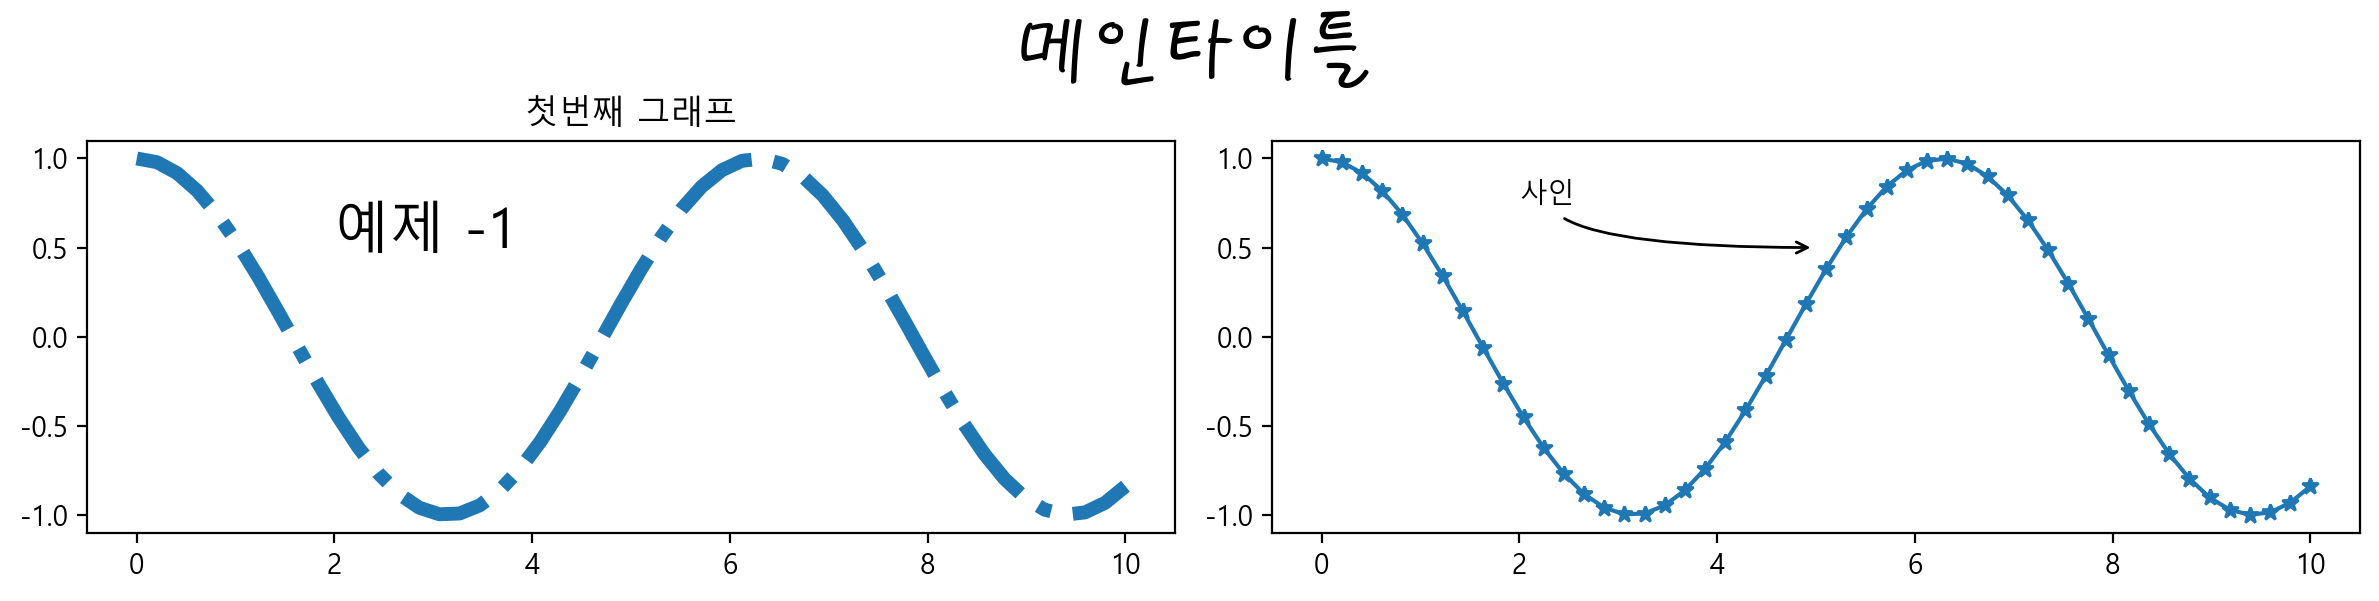

In [19]:
import numpy as np
x = np.linspace(0, 10) # 0부터 10까지 50개 구간을 나눠서 가져와 num=50(기본값)
y = np.cos(x)
fig, axes = plt.subplots(1, 2, figsize=(12,3))
axes[0].plot(x, y, linewidth=5, linestyle='-.')
axes[0].text(2, 0.5, '예제 -1', fontsize=20) # text(좌표x,y)
axes[1].plot(x, y, marker='*')

axes[0].set_title('첫번째 그래프')

axes[1].annotate("사인", xytext=(2, 0.75), # xytext(x, y)글자가 있을 좌표 위치 (좌하)
                 xy=(5, 0.5),             # xy=(x,y)화살표가 가르킬 좌표 (좌하)
                 arrowprops=dict(arrowstyle="->",
                                connectionstyle='angle3')) # angle(직각직선), arc(직선), ...

plt.tight_layout(rect=[0,0,1,0.9]) # 서브타이틀 위치조정 rect=(left, bottom, right, top) : 경계의 상대적 비율

plt.suptitle('메인타이틀', fontproperties=font_prop)
plt.show

### 3) 수학기호
- 각종 수학 기호(교안30page) : https://matplotlib.org/users/mathtext.html

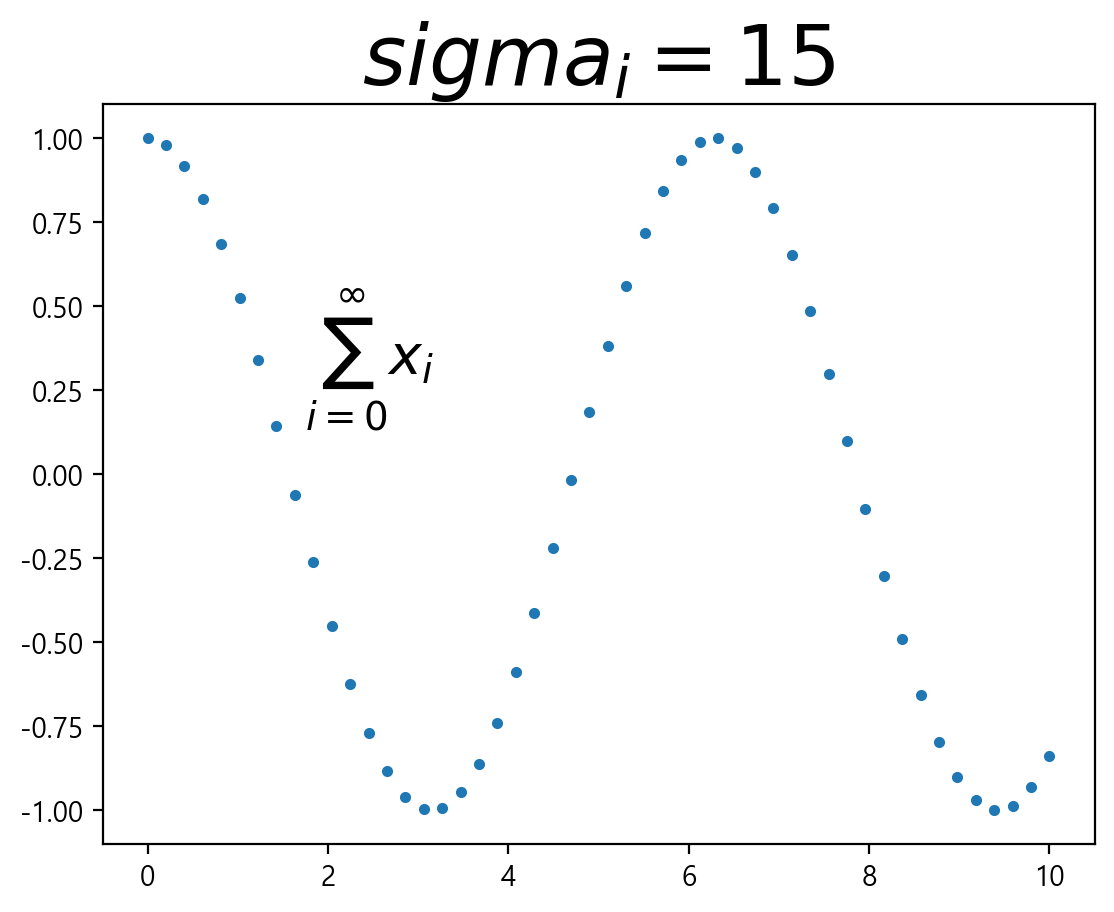

In [29]:
plt.scatter(x, y, marker='.')
plt.title(r'$sigma_i = 15$', fontsize=30)
plt.text(1.75, 0.3, r'$\sum_{i=0}^\infty x_i$', fontsize=20)
plt.show()

### 4)  축과 눈금
- 축과 눈금(교안32page) : https://matplotlib.org/3.1.0/api/axis_api.html

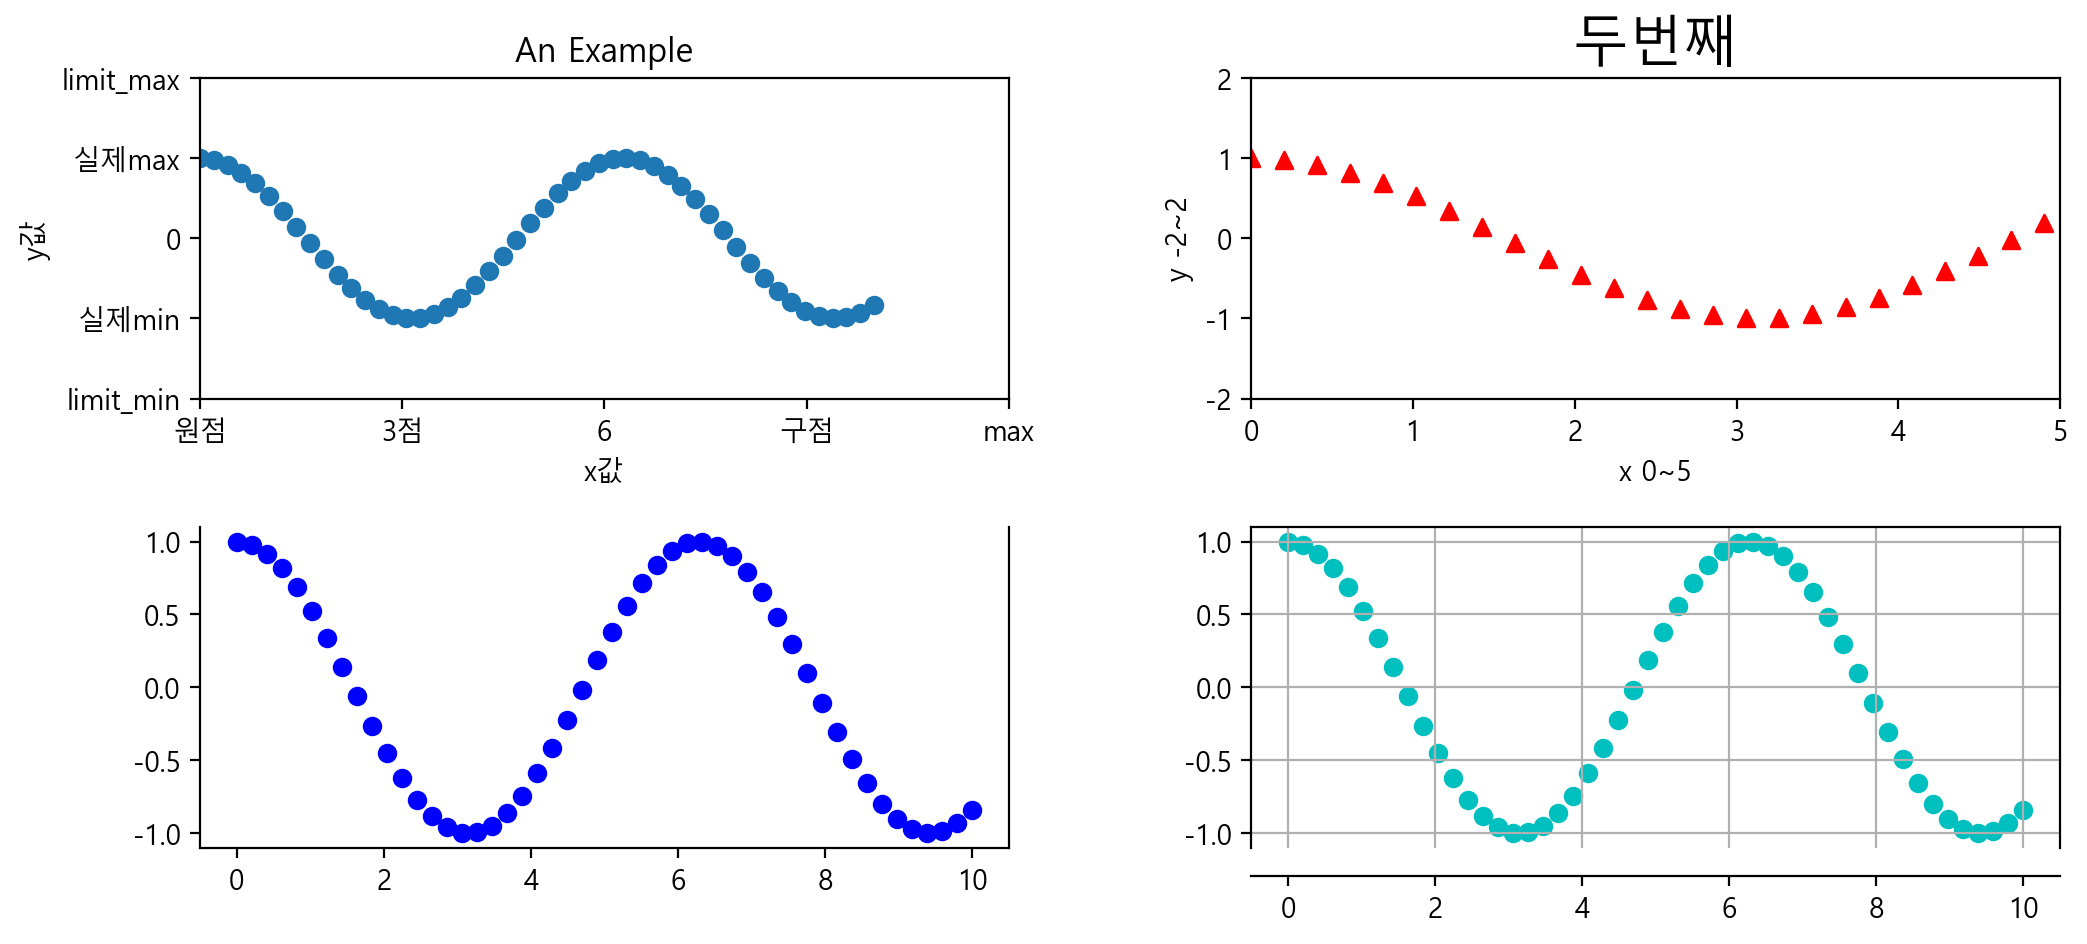

In [43]:
import numpy as np
x = np.linspace(0, 10) # 0부터 10까지 50개(기본값) 값을 배열로 생성
y = np.cos(x)
fig, axes = plt.subplots(2, 2, figsize=(12,5))

# 서브 플롯끼리 여백 조정
plt.subplots_adjust(hspace=0.4, wspace=0.3) # hspace=위아래 여백, wspace=좌우 여백

# 각 그래프 커스터마이징
axes[0,0].scatter(x, y)
axes[0, 0].set(title='An Example', ylabel='y값', xlabel='x값',
               xlim=[0, 12], # x축 눈금의 범위
               ylim=[-2, 2], # y축 눈금의 범위
               xticks=[0, 3, 6, 9, 12], # x축 눈금
               xticklabels=['원점', '3점', 6, '구점', 'max'], # x축 눈금 라벨
               yticks=[-2, -1, 0, 1, 2], # y축 눈금
               yticklabels=['limit_min', '실제min', 0, '실제max', 'limit_max'], # y축 눈금 라벨
               )

axes[0,1].scatter(x, y, c='r', marker='^')
axes[0,1].set_title('두번째', fontsize=20)
axes[0,1].set_xlim(0,5) # set(xlim=[0.5])
axes[0,1].set_ylim(-2,2)
axes[0,1].set_xlabel('x 0~5')
axes[0,1].set_ylabel('y -2~2')

axes[1,0].scatter(x, y, c='b')
axes[1,0].spines['top'].set_visible(False) # 그래프 외곽 선 없애기

axes[1,1].scatter(x, y, c='c')
axes[1,1].spines['bottom'].set_position( ('outward', 10) ) # 그래프 외곽 선 간격 띄우기
axes[1,1].grid(True)
plt.show()

### 5) 축 공유

In [46]:
x = np.arange(0, 10)
y1 = 0.5 * x**2
y2 = -y1

<function matplotlib.pyplot.show(close=None, block=None)>

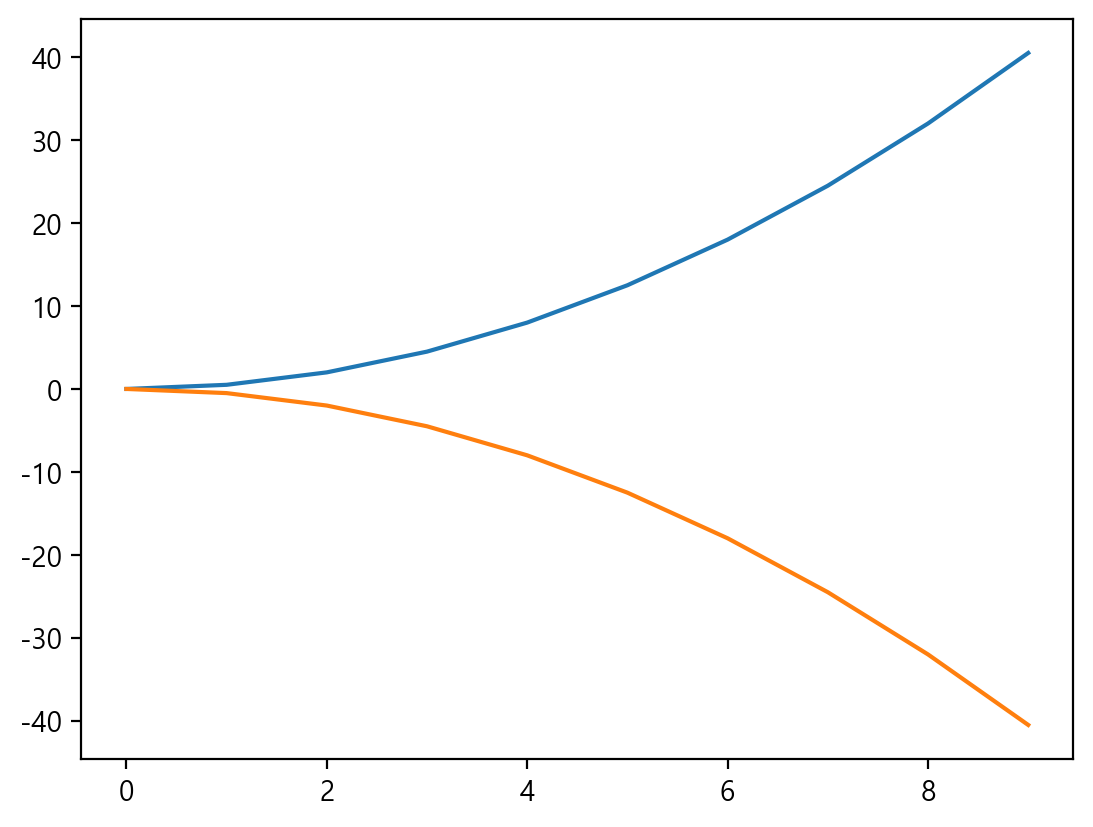

In [45]:
plt.plot(x, y1)
plt.plot(x, y2)
plt.show

#### 딥러닝 공유 코드

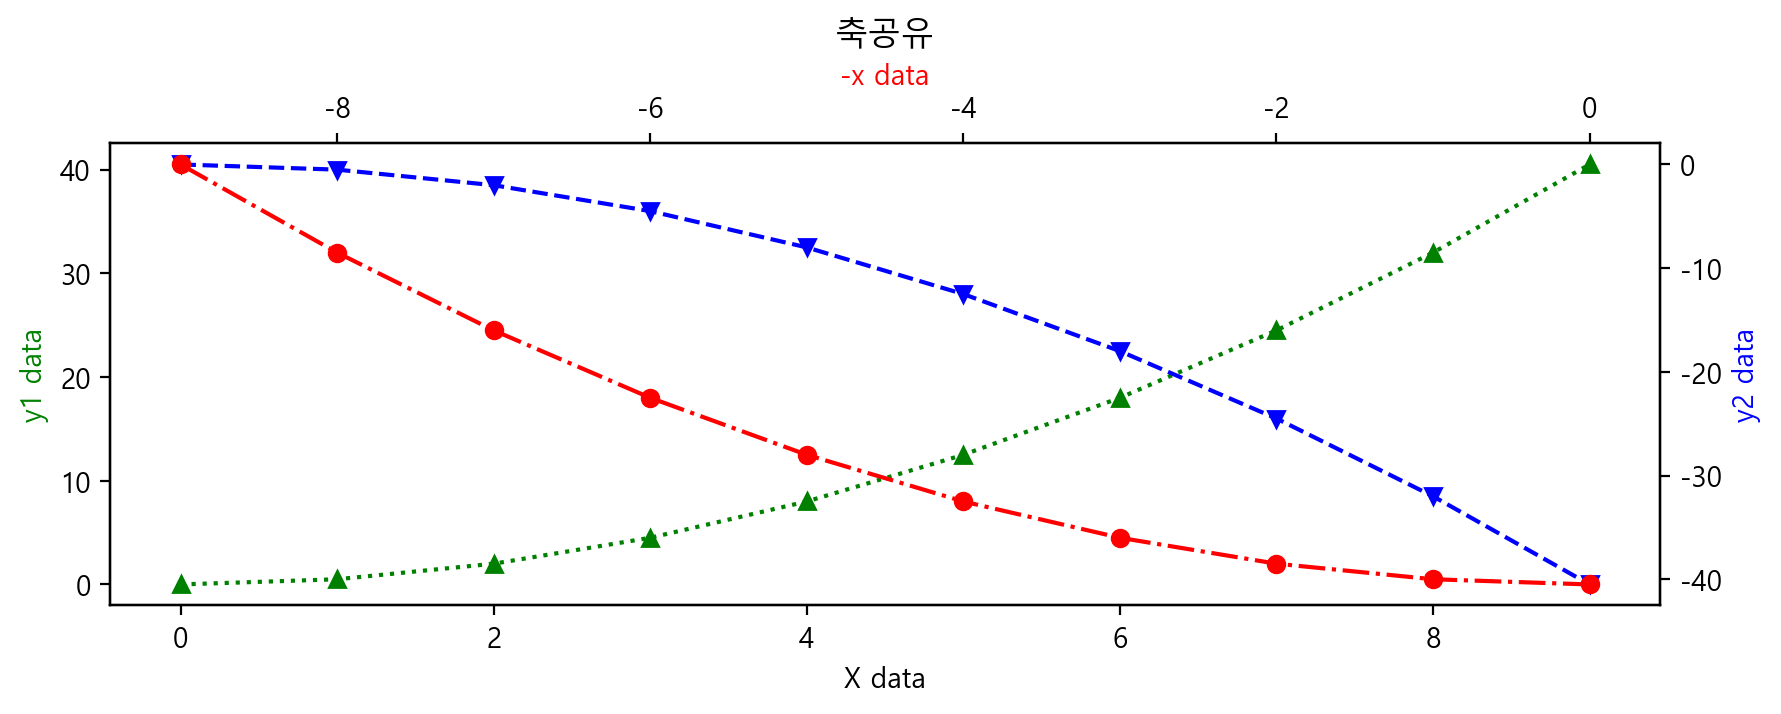

In [51]:
fig, ax1 = plt.subplots(figsize=(10,3)) # nrow=1, ncol=1 (기본값)
ax1.plot(x, y1, 'g^:')
ax1.set(title='축공유', xlabel='X data')
ax1.set_ylabel('y1 data', c='g')

ax2 = ax1.twinx() # ax1과 x축을 공유하는 ax2
ax2.plot(x, y2, 'bv--')
ax2.set_ylabel('y2 data', c='b')

ax3 = ax1.twiny() # ax1과 y축을 공유하는 ax3
ax3.plot(-x, y1, 'ro-.')
ax3.set_xlabel('-x data', c='r')
plt.show()

### 6) 범례표시
- 범례사용 : https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

### 7) 플롯 스타일 지정

<function matplotlib.pyplot.show(close=None, block=None)>

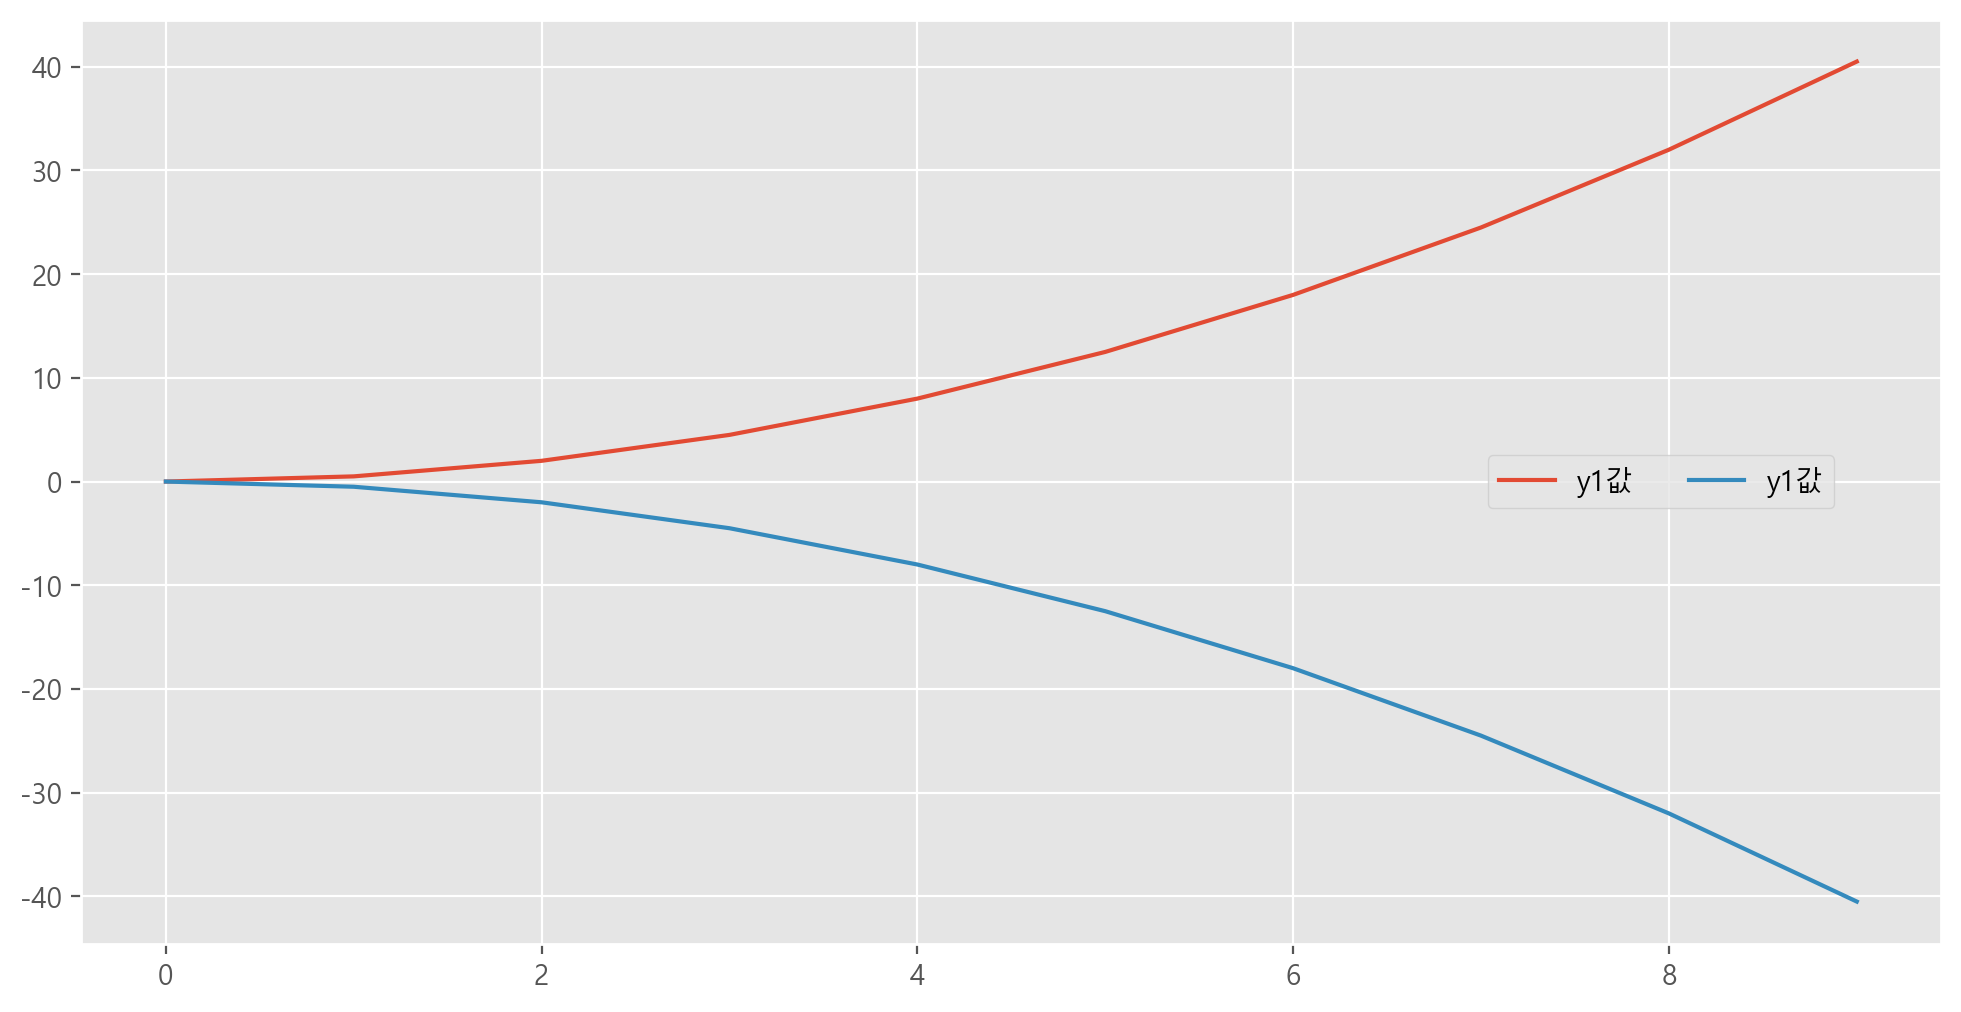

In [57]:
plt.style.use('ggplot') # 그래프 스타일 지정하는 함수를 쓰면 모든 설정이 초기화 될 수 있음
plt.figure(figsize=(12,6))
plt.plot(x, y1, label='y1값')
plt.plot(x, y2, label='y1값')
plt.legend(loc='center right', ncol=2, bbox_to_anchor=(0.95, 0.5)) # 레전드 loc 위치 조정 loc='left', ncol=2 가로로표시
plt.show